In [3]:
# imports
import pandas as pd
from Bio.KEGG.REST import *
from Bio.KEGG.KGML import KGML_parser
#from Bio.Graphics.KGML_vis import KGMLCanvas

from IPython.display import Image
from IPython.display import IFrame

from io import StringIO

## Task 3: KEGG map visualization

#### reminder:

http://nbviewer.jupyter.org/github/widdowquinn/notebooks/blob/master/Biopython_KGML_intro.ipynb

#### remark:

In real life you may want to use the R-based tool pathview: https://bioconductor.org/packages/release/bioc/html/pathview.html or use r2py for using pathview from Python.

For Python (in addition to the Biopyhton module) https://github.com/idekerlab/py2cytoscape in combination with https://github.com/idekerlab/KEGGscape may be another alternative.

Generally speaking, it is always a good idea to pay attention also to other pathway databases like Reactome or WikiPathways etc. and not just KEGG.

But we will restrict ourselves in this course to visualizing native KEGG pathways using Biopython.

In [8]:
genes_df = pd.read_csv('pathway_data\\genes_df.csv')
path_df = pd.read_csv('pathway_data\\pathway_df.csv')


In [42]:
display(genes_df.head())
display(path_df.head())
gene_df2 = genes_df.set_index('entrez')
display(genes_df2)

,Unnamed: 0,Gene.1,log2fc,pvals_stud,p-values-corr,log10_p,log10_p-corr,marker_symbol,entrez,path,significant
0,0,1300017J02Rik,0.097913,1.437779e-03,4.547863e-03,2.842308,2.342193,1300017J02Rik,71775,path:mmu04066,False
1,3,1700009N14Rik,0.013491,7.294744e-01,7.975933e-01,0.136990,0.098219,1700009N14Rik,75471,path:mmu03008,False
2,6,1700024P04Rik,0.334123,2.890561e-16,2.465445e-14,15.539018,13.608105,1700024P04Rik,69382,path:mmu05034,False
3,9,1700061G19Rik,0.029780,4.639205e-01,5.672044e-01,0.333556,0.246260,1700061G19Rik,78625,path:mmu00061,False
4,15,1810009J06Rik,0.409928,1.144060e-16,1.072127e-14,15.941551,13.969754,1810009J06Rik,73626,path:mmu04080,False


,path,binom_value,binom_values-corr,genes_in_pathway,signi_genes_in_pathway
0,path:mmu00010,1.0,1.0,61,0.0
1,path:mmu00020,1.0,1.0,31,0.0
2,path:mmu00030,1.0,1.0,30,0.0
3,path:mmu00040,1.0,1.0,24,0.0
4,path:mmu00051,1.0,1.0,33,0.0


,Unnamed: 0,Gene.1,log2fc,pvals_stud,p-values-corr,log10_p,log10_p-corr,marker_symbol,path,significant
entrez,,,,,,,,,,
71775,0,1300017J02Rik,0.097913,1.437779e-03,4.547863e-03,2.842308,2.342193,1300017J02Rik,path:mmu04066,False
75471,3,1700009N14Rik,0.013491,7.294744e-01,7.975933e-01,0.136990,0.098219,1700009N14Rik,path:mmu03008,False
69382,6,1700024P04Rik,0.334123,2.890561e-16,2.465445e-14,15.539018,13.608105,1700024P04Rik,path:mmu05034,False
78625,9,1700061G19Rik,0.029780,4.639205e-01,5.672044e-01,0.333556,0.246260,1700061G19Rik,path:mmu00061,False
73626,15,1810009J06Rik,0.409928,1.144060e-16,1.072127e-14,15.941551,13.969754,1810009J06Rik,path:mmu04080,False
67373,19,2210010C04Rik,-0.022529,8.312151e-01,8.775545e-01,0.080287,0.056726,2210010C04Rik,path:mmu04080,False
67028,23,2610002M06Rik,-0.096024,4.852986e-02,9.080895e-02,1.313991,1.041871,2610002M06Rik,path:mmu04144,False
72128,25,2610008E11Rik,0.013877,6.947239e-01,7.708759e-01,0.158188,0.113016,2610008E11Rik,path:mmu05168,False
69944,26,2810021J22Rik,-0.068492,9.555023e-02,1.593720e-01,1.019768,0.797588,2810021J22Rik,path:mmu05168,False


### Subtask 3.1: Pick some significantly enriched KEGG pathways of your choice from 2.3 and visualize them
The simplest way is to get the images directly using `kegg_get` and draw them using `Image(kegg_get(...))`

,path,binom_value,binom_values-corr,genes_in_pathway,signi_genes_in_pathway
14,path:mmu00140,4.778557e-08,0.000008,75,8.0
57,path:mmu00591,1.678845e-05,0.001368,47,5.0
76,path:mmu00830,9.147059e-07,0.000099,76,7.0
291,path:mmu05204,3.835066e-09,0.000001,79,9.0


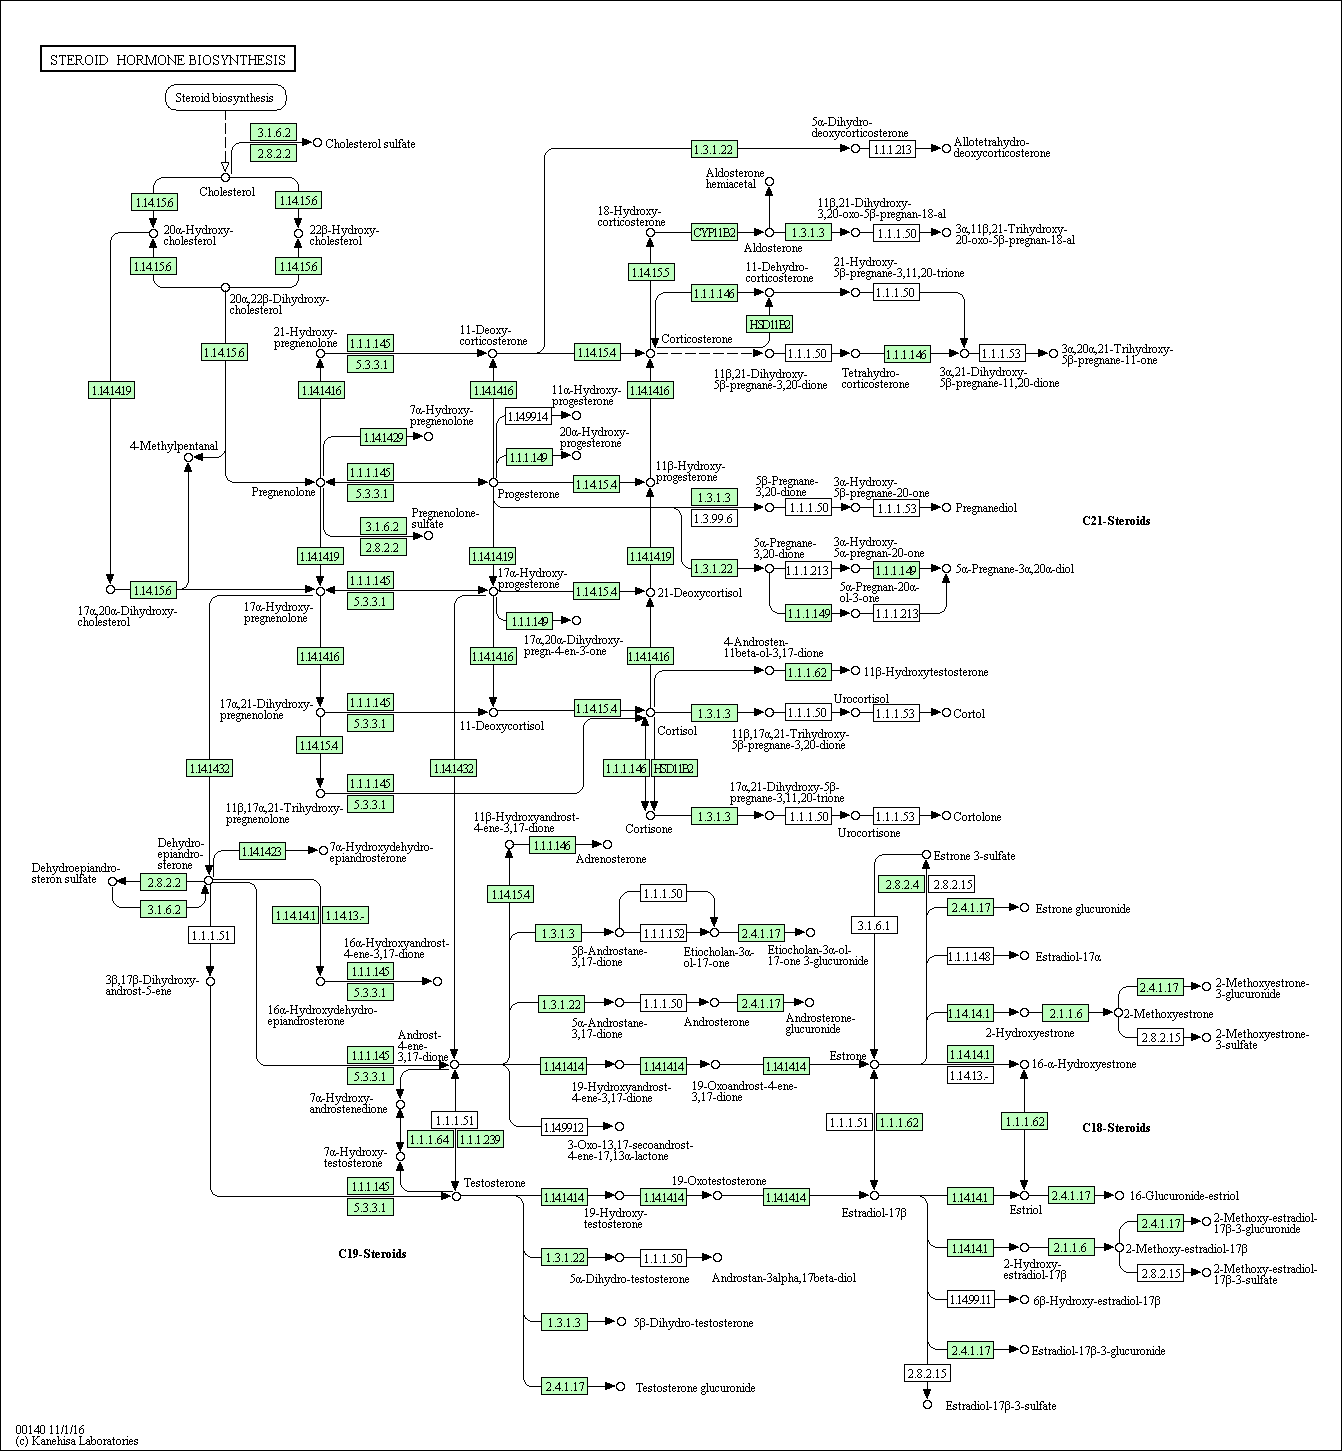

In [14]:
sig_path = path_df[path_df['binom_values-corr'] < 0.05]
display(sig_path.head())
#Image
Image(kegg_get('path:mmu00140', 'image').read())

### Subtask 3.2: Define a suitable color scheme respresenting the fact whether a gene is significantly expressed or not
Use three colors:
1. not significant
2. significantly overexpressed in CD
3. significantly overexpressed in HFD

Alternatively, if you have enough time, use a continuous color gradient from color 2 to 3.

hint: 

http://www.rapidtables.com/web/color/RGB_Color.htm

hint 2:
Start with the next task 3.3, then it will be more clear, in what format you will need these colors

In [15]:
c_not_sig = '000000'
c_sig_CD = 'FF0000'
c_sig_HFD = '1100FF'

### Subtask 3.3: Visualize the pathway(s) from 3.1 in such a way that the included genes have the corresponding color from 3.2
You may need to define a suitable mapping from single genes to what is actually shown in the pathway map...<br>
Use `KGMLCanvas(pathway, import_imagemap=True).draw(PDF_filename)` to draw them and save them as a PDF file, then `IFrame(PDF_filename)` to visualize them inside this notebook.<br>
Wrap all this in a function to be able to repeat this for other pathways as well.

In [50]:
def where_substring(str_list, substr):
    #finds substring in list of strings returns boo list
    out_list = []
    for i, en in enumerate(str_list):
        if str(substr) == str(en):
            out_list.append(en)
    return out_list


path_name = 'path:mmu00010'
gene_df_path = gene_df2.loc[gene_df2['path'] == path_name]
pathway = KGML_parser.read(kegg_get(path_name, "kgml"))
gen_index = gene_df_path.index.tolist()
for gene in pathway.genes:
    all_arg_where = []
    for sub_gene in gene.name.split(' '):
        sub_gene = sub_gene.replace('mmu:', '')
        #print(sub_gene)
        arg_where = where_substring(gen_index, sub_gene)
        if len(arg_where) > 1:
            print('Warning: Found more than one entry in gen_df for', subgene)
        if len(arg_where) == 1:
            all_arg_where.append(arg_where[0])
    if len(all_arg_where) > 1:
        print('Warning: Found more than one entry for collection of genes for', gene.name)
    elif len(all_arg_where) == 0:
        print('Warning: Found NO entry for collection of genes for', gene.name)
    else:
        significant = gene_df_path.loc[all_arg_where[0],'significant']
        log2df = gene_df_path.loc[all_arg_where[0],'log2fc']
        print(significant)
        
        
    

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [51]:
print(gen_index)
print(sub_gene)
gene_df_path

[68738, 60525, 11522, 26876, 11532, 11529, 72141, 56847, 72535, 11669, 11670, 11671, 67689, 621603, 110695, 56752, 11674, 353204, 230163, 11676, 12183, 235339, 13382, 13806, 13807, 13808, 14121, 14120, 14377, 14378, 68401, 319625, 14433, 14447, 103988, 14751, 15275, 15277, 212032, 216019, 16828, 106557, 16832, 16833, 17330, 18534, 74551, 18597, 18598, 68263, 18641, 18642, 56421, 18648, 56012, 18655, 18663, 72157, 66681, 18770, 21991]
17330


,Unnamed: 0,Gene.1,log2fc,pvals_stud,p-values-corr,log10_p,log10_p-corr,marker_symbol,path,significant
entrez,,,,,,,,,,
68738,481,Acss1,0.086941,2.905035e-02,5.895662e-02,1.536849,1.229467,Acss1,path:mmu00010,False
60525,487,Acss2,-0.074918,4.001402e-01,5.049157e-01,0.397788,0.296781,Acss2,path:mmu00010,False
11522,1058,Adh1,-0.020616,3.578700e-01,4.621536e-01,0.446275,0.335214,Adh1,path:mmu00010,False
26876,1066,Adh4,-0.078723,2.390207e-01,3.353046e-01,0.621565,0.474560,Adh4,path:mmu00010,False
11532,1074,Adh5,-0.014332,5.823874e-01,6.755793e-01,0.234788,0.170324,Adh5,path:mmu00010,False
11529,1083,Adh7,-0.044018,2.252622e-01,3.197425e-01,0.647312,0.495200,Adh7,path:mmu00010,False
72141,1135,Adpgk,-0.038610,3.668882e-01,4.716312e-01,0.435466,0.326397,Adpgk,path:mmu00010,False
56847,1648,Aldh1a3,-0.008281,8.264098e-01,8.740450e-01,0.082805,0.058466,Aldh1a3,path:mmu00010,False
72535,1659,Aldh1b1,-0.404703,1.542665e-06,1.145328e-05,5.811728,4.941070,Aldh1b1,path:mmu00010,False


In [24]:
gene.name

'mmu:17330'

In [16]:

# some hints on how the data structures of a random pathway look like:
# run this and check the output below to see what is stored in the fields (and what type of data you can put into them)
pathway = KGML_parser.read(kegg_get('mmu00010', "kgml"))
print('### Pathway description ###')
print(pathway)

print('### Genes: ###')
for gene in pathway.genes[0:3]:
    print('### New gene: ###')
    print(gene.name) # each gene may contain multiple ID numbers, you should map and compare them all to your DE gene list
    for graphic in gene.graphics:
        print('### Current gene color: ###')
        print(graphic.bgcolor)
        


### Pathway description ###
Pathway: Glycolysis / Gluconeogenesis
KEGG ID: path:mmu00010
Image file: http://www.kegg.jp/kegg/pathway/mmu/mmu00010.png
Organism: mmu
Entries: 100
Entry types:
	ortholog: 27
	gene: 35
	compound: 31
	map: 7

### Genes: ###
### New gene: ###
mmu:11674 mmu:11676 mmu:230163 mmu:353204
### Current gene color: ###
#BFFFBF
### New gene: ###
mmu:110695 mmu:11669 mmu:11671 mmu:56752 mmu:72535
### Current gene color: ###
#BFFFBF
### New gene: ###
mmu:11670 mmu:56847 mmu:621603 mmu:67689 mmu:73458
### Current gene color: ###
#BFFFBF


### Subtask 3.4: Change other attributes of the map

Besides the background color, you have access to other attributes of the nodes.<br>
The labels on the nodes can be very confusing, containing a long list of alternative gene symbols for each gene.<br>
Change the labels of the nodes to the gene names from the DE data (hint: `graphic.name`).

### Subtask 3.5: Pathway intersections

Many genes can be found in multiple pathways.<br>
Look for diff. exp. genes in an enriched pathway that are part of at least one other pathway, visualize two such pathways using your binary color scheme. How many other diff. exp. genes are in this second pathway? Are there similarities in the interactions of this gene between these two pathways?